**10) Data Visualization III**
Download the Iris flower dataset or any other dataset into a DataFrame. (e.g., https://archive.ics.uci.edu/ml/datasets/Iris ). Scan the dataset and give the inference as:
1. List down the features and their types (e.g., numeric, nominal) available in the dataset.
2. Create a histogram for each feature in the dataset to illustrate the feature distributions.
3. Create a boxplot for each feature in the dataset.
4. Compare distributions and identify outliers.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np

In [4]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

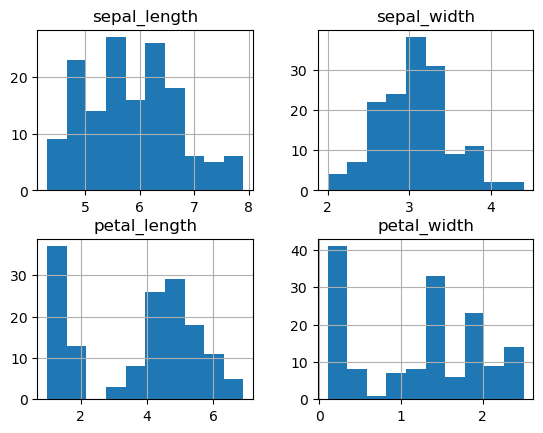

In [11]:
df.hist()

In [19]:
sort_data = np.sort(df['sepal_length'])
mean = np.mean(df['sepal_length'])
std = np.std(df['sepal_length'])
outliers=[]
for x in sort_data:
    z = (x - mean)/std
    if z >2:
        outliers.append(x)
        
print(outliers)

[7.6, 7.7, 7.7, 7.7, 7.7, 7.9]


In [27]:
sort_data2 = np.sort(df['sepal_width'])
Q1 = np.percentile(sort_data2, 25, interpolation='midpoint')
Q3 = np.percentile(sort_data2, 75, interpolation='midpoint')
IQR = Q3 - Q1
print("Q1 : ",Q1, "\n", "Q3: ",Q3)
print("inter quartile range : ", IQR)
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR
print('low_limit is', low_limit)
print('up_limit is', up_limit)

outliers = []
for x in sort_data2:
    if ((x < low_limit) or (x > up_limit)):
        outliers.append(x)
        
print(outliers)

Q1 :  2.8 
 Q3:  3.3
inter quartile range :  0.5
low_limit is 2.05
up_limit is 4.05
[2.0, 4.1, 4.2, 4.4]


C:\Users\swapn\AppData\Local\Temp\ipykernel_15592\1731035836.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(sort_data2, 25, interpolation='midpoint')
C:\Users\swapn\AppData\Local\Temp\ipykernel_15592\1731035836.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(sort_data2, 75, interpolation='midpoint')


<Axes: xlabel='species', ylabel='sepal_width'>

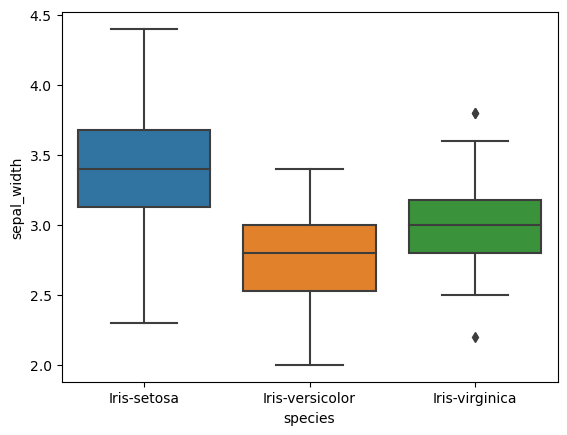

In [28]:
sbn.boxplot(data=df, x='species', y='sepal_width')

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

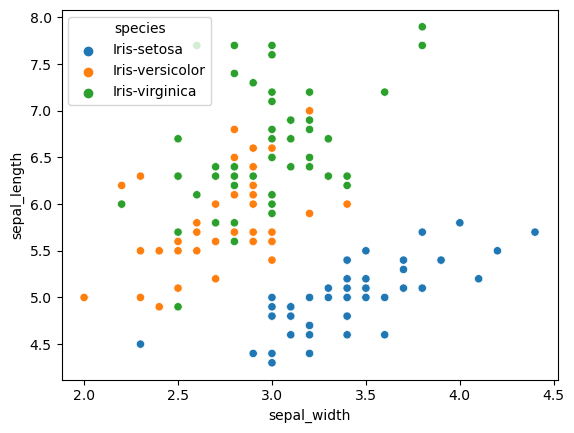

In [33]:
sbn.scatterplot(data=df, x='sepal_width', y='sepal_length', hue='species')